# General scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

# PMNS matrix 2018 to $3\sigma$

 https://arxiv.org/abs/1708.01186

In [4]:
import NEUTRINO2018
import neutrino_analytic3

In [5]:
xd0 = pd.read_csv('general-scan.csv')
del xd0['Unnamed: 0']

In [6]:
xd0.shape

(17396, 59)

In [8]:
xd0.shape[0]-17396

0

## Removing the higgses with $m_{h1} < 125$ GeV

In [9]:
xd0.mh1.min()

7.25241442

In [10]:
xd01 = xd0[np.logical_and(xd0.mh1 >= 124.5 , xd0.mh2 >= 124.5)]

In [11]:
print(xd0.shape[0],xd01.shape[0])
print(xd01.mh1.min(),xd01.mh1.max(),xd01.mh2.min(),xd01.mh2.max())

17396 15553
124.501042 124.861947 125.049126 137045.15099999998


## Scalar mising angle 

\begin{equation}
\begin{pmatrix}
h_0 \\ S^0
\end{pmatrix} =
Z^H
\begin{pmatrix}
h_1 \\ h_2
\end{pmatrix}
 =
\begin{pmatrix}
\cos\alpha & \sin\alpha \\
-\sin\alpha & \cos\alpha 
\end{pmatrix}
\begin{pmatrix}
h_1 \\ h_2
\end{pmatrix}\,.
\end{equation}


$|\sin\alpha| < 0.3$  https://arxiv.org/abs/1502.01361

In [12]:
print(np.abs(xd01.ZH12).min(),np.abs(xd01.ZH12).max())

1.2139404600000002e-07 0.636128007


In [13]:
xd1 = xd01[np.logical_and(np.abs(xd01.ZH12) < 0.3 , 1>0)]

print(xd0.shape[0],xd01.shape[0],xd1.shape[0])

17396 15553 15551


### Perturbativity YRC, LSP, LSPH, Ya,Yb < 3

In [14]:
print('+++++++++++++ YAij +++++++++++++++++++++')
print(np.abs(xd0.YRA11).max(),np.abs(xd0.YRA12).max(),np.abs(xd0.YRA13).max())
print(np.abs(xd0.YRA21).max(),np.abs(xd0.YRA22).max(),np.abs(xd0.YRA23).max())
print('+++++++++++++ YBij ++++++++++++++++++++')
print(np.abs(xd0.YRB11).max(),np.abs(xd0.YRB12).max(),np.abs(xd0.YRB13).max())
print(np.abs(xd0.YRB21).max(),np.abs(xd0.YRB22).max(),np.abs(xd0.YRB23).max())

+++++++++++++ YAij +++++++++++++++++++++
0.0 0.9999087496761008 0.9993914671076732
0.0 0.9998798962626192 0.9999200222186412
+++++++++++++ YBij ++++++++++++++++++++
72214.88905495327 362466.89911502076 297376.60988897725
202226.98903195185 718619.4721218558 580580.6543536902


In [15]:
s1 = xd1[np.logical_and(np.abs(xd1.YRC) < 3. , np.abs(xd1.LamSP) < 3.)]
s2 = s1[np.logical_and(np.abs(s1.LamSPH) < 3. , np.abs(s1.YRB11) < 3.)]
s3 = s2[np.logical_and(np.abs(s2.YRB12) < 3., np.abs(s2.YRB13) < 3.)]
s4 = s3[np.logical_and(np.abs(s3.YRB21) < 3., np.abs(s3.YRB22) < 3.)]
xd = s4[np.logical_and(np.abs(s4.YRB23) < 3., 0 < 1)]

In [16]:
print(xd0.shape[0], s1.shape[0], s2.shape[0], s3.shape[0], s4.shape[0], xd.shape[0])

17396 14691 14250 14040 13714 13702


# Analytical diagonalization rutine for Neutrino mass matriz

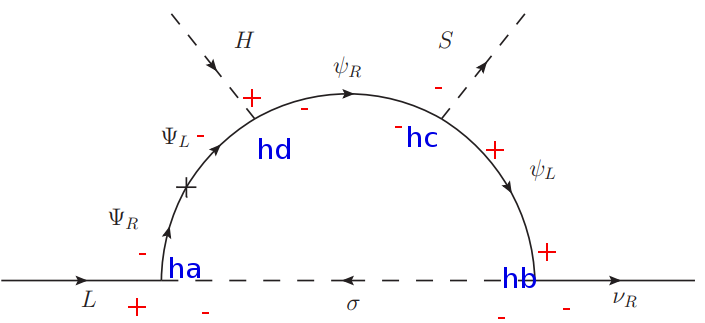

In [17]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

Example:

In [18]:
#Reset index to imput new data to the dataframe
xd = xd.reset_index()
del[xd['index']]

In [19]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]

xd['mn2'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]

xd['mn3'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [20]:
##WARNING: The vev change in SPheno
xd[['mv1','mn1','mv2','mn2','mv3','mn3']][:3]

,mv1,mn1,mv2,mn2,mv3,mn3
0,3.669953e-19,4.336809e-19,8.950439e-12,8.950438e-12,4.981227e-11,4.981237e-11
1,2.810458e-19,0.000000e+00,8.813628e-12,8.813473e-12,4.910643e-11,4.910646e-11
2,3.687184e-19,0.000000e+00,8.957013e-12,8.957013e-12,4.990374e-11,4.990376e-11


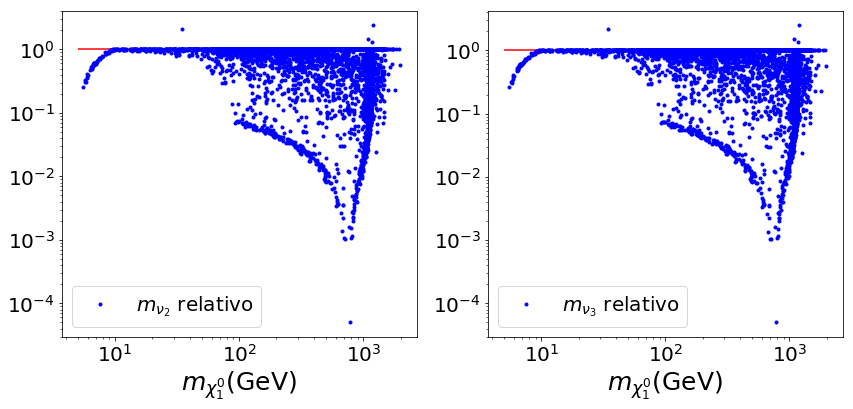

In [22]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.loglog(xd.mChi1, xd.mv2/xd.mn2, 'b.',label=r'$m_{\nu_2}$ relativo')
plt.hlines(1,5,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.subplot(122)
plt.loglog(xd.mChi1, xd.mv3/xd.mn3, 'b.',label=r'$m_{\nu_3}$ relativo')
plt.hlines(1,5,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.show()

filter the good points

In [23]:
xd3 = xd[np.logical_and(xd.mv2/xd.mn2 <1.05, xd.mv2/xd.mn2 >0.95)]
xd4 = xd3[np.logical_and(xd3.mv3/xd3.mn3 <1.05, xd3.mv3/xd3.mn3 >0.95)]
xd = xd4

In [25]:
print(xd.shape[0])
print(xd.shape[0]-4900)

4900
0


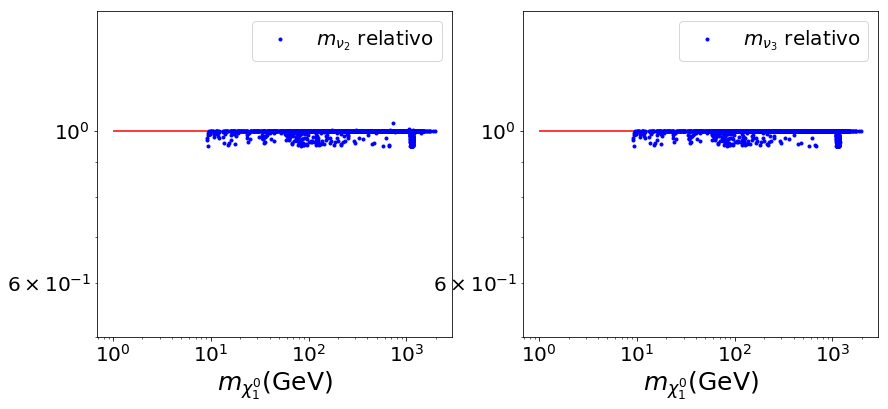

In [26]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.loglog(xd.mChi1, xd.mv2/xd.mn2, 'b.',label=r'$m_{\nu_2}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.ylim(0.5,1.5)

plt.subplot(122)
plt.loglog(xd.mChi1, xd.mv3/xd.mn3, 'b.',label=r'$m_{\nu_3}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()
plt.ylim(0.5,1.5)

plt.show()

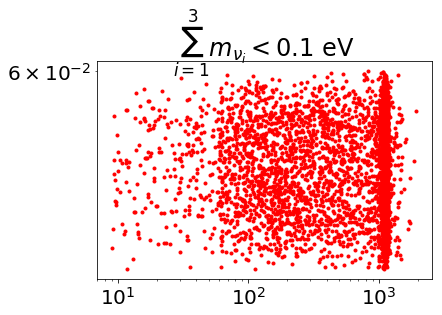

In [31]:
plt.loglog(xd.mChi1, (xd.mn1+xd.mn2+xd.mn3)*1e9,'r.')
#plt.hlines(0.1,1e1,1e3,'b')
plt.title(r'$\sum_{i=1}^3m_{\nu_i}<0.1$ eV')
plt.show()

In [32]:
#Experimental values for DM: Latest Planck results 2018
### WARNING 
e = 5
Omega = 0.120
Omega_min=Omega - e*0.001
Omega_max=Omega + e*0.001
print( Omega_min, Omega,Omega_max)

0.11499999999999999 0.12 0.125


DM cut

In [34]:
xDM = xd[np.logical_and(xd.Omega>Omega_min, xd.Omega < Omega_max)]
print(xd.shape[0], xDM.shape[0])
print(xDM.shape[0]-3494)

4900 3494
0


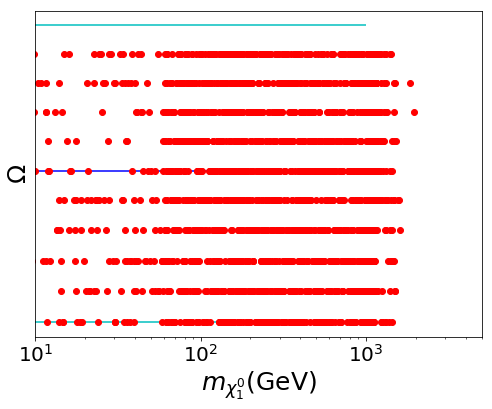

In [35]:
plt.figure(figsize=(8,6))

#plt.loglog(xd0.mChi1,xd0.Omega,'co')
plt.loglog(xDM.mChi1,xDM.Omega,'ro')
plt.hlines(Omega_max,1,1e3, 'c',label=r'')
plt.hlines(Omega_min,1,1e3, 'c',label=r'')
plt.hlines(Omega,1,1e3, 'b',label=r'0.11')

#plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\Omega$',size=25)
plt.xlim(10,5e3)
#plt.ylim(11.2e-2,1.3e-1)

plt.show()

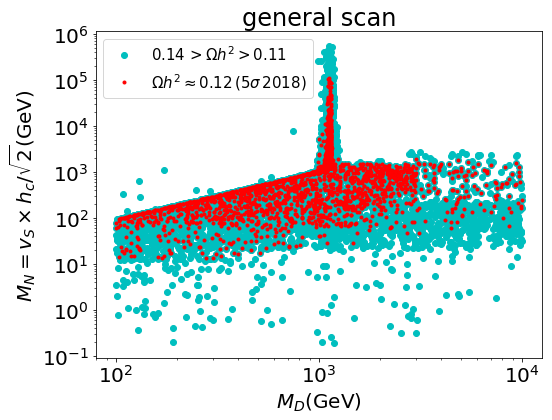

In [36]:
plt.figure(figsize=(8,6))

plt.loglog(xd0.MDF, xd0.vS*xd0.YRC/np.sqrt(2),'co',label=r'$0.14\,> \Omega h^2 > 0.11$')
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'r.',label=r'$\Omega h^2 \approx 0.12\, (5\sigma\, 2018)$')
plt.title('general scan')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=20)
plt.ylabel(r'$M_N=v_S \times h_c /\sqrt{2}$(GeV)',size=20)

plt.show()

# Experimental Constraints after the relic density cut

In [37]:
from indirectdirect import *

# $\sigma_{SI}$ 

Import DD constraints

In [38]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

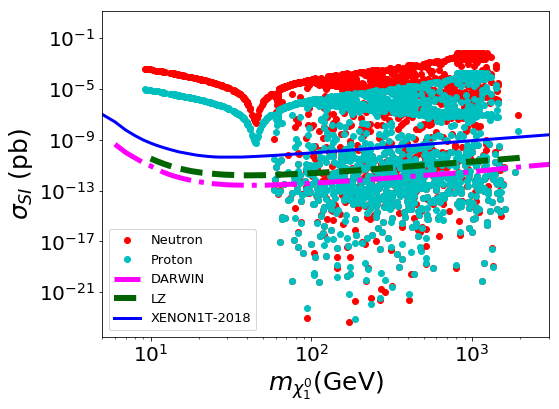

In [41]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.mChi1, xDM.NSI, 'ro',label='Neutron')
plt.plot(xDM.mChi1, xDM.PSI, 'co',label='Proton')
plt.legend()

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=5,label='DARWIN')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=6,label='LZ')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'b-',lw=3,label='XENON1T-2018')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.xlim(5,3e3)

plt.show()

# Analytic expression: $\sigma_{SI}$

Scalar interaction with the Higss

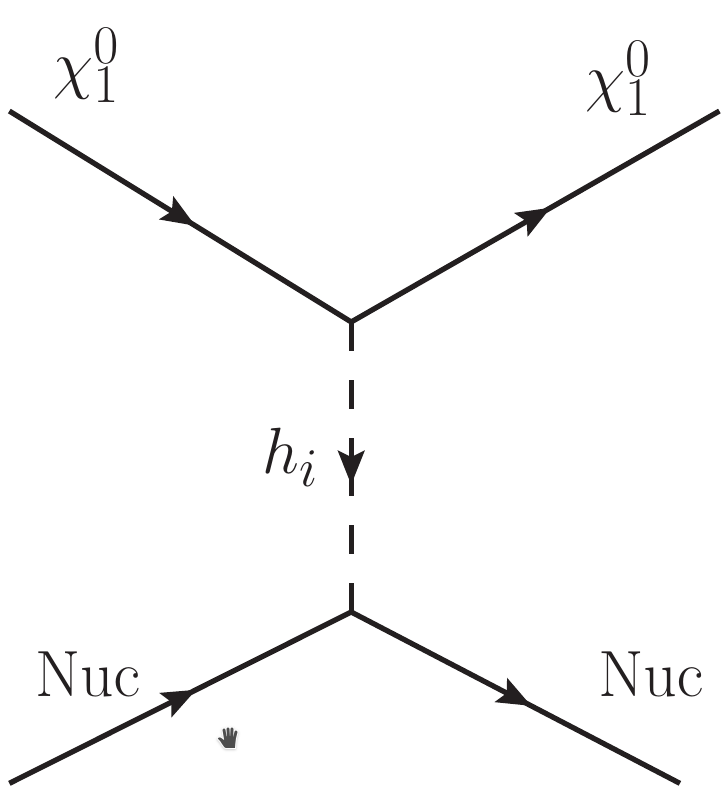

In [42]:
from IPython.display import Image
Image("SI-mass-basis.png", width=200)

In [43]:
#Parameters
fN = 0.25
#SARAH
#v = 244.874425
v = 246.
#nucleon mass in GeV (proton)
MNp = 938.27*1.e-3
MNn = 939.56*1.e-3 #(neutron mass)
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000
#MW      = 80.385
#MZ      = 91.187

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

http://www.saha.ac.in/theory/palashbaran.pal/conv.html

In [44]:
#Reset index to imput new data to the dataframe
xDM = xDM.reset_index()
del[xDM['index']]


\begin{equation}
C_{\chi_1\chi_1 h_k} = C_{11k} = \dfrac{-i}{\sqrt{2}}U_{12}\left(h_cV_{12}Z^H_{k2}+h_dV_{11}Z^H_{k1}\right)
\end{equation}

In [45]:
#Add vertices to the dataframe
xDM['cxxh1'] = (xDM.YRC*xDM.XV21*xDM.ZH12 + xDM.YRD*xDM.XV11*xDM.ZH11)*(xDM.XU12/np.sqrt(2.))
xDM['cxxh2'] = (xDM.YRC*xDM.XV12*xDM.ZH22 + xDM.YRD*xDM.XV11*xDM.ZH21)*(xDM.XU12/np.sqrt(2.))

Total: For neutron and protons

\begin{equation}
\sigma_{SI} = 
\dfrac{m_r^2}{\pi}\left(\dfrac{(f_N) m_N}{v_{\text{SM}}}\right)^2
\left(\dfrac{C_{111}Z^H_{11}}{mh_1^2} + \dfrac{C_{112}Z^H_{21}}{mh_2^2} \right)^2
\end{equation}

In [46]:
xDM['mr'] = MNn*xDM.mChi1/(MNn+xDM.mChi1)

Only for neutron

In [47]:
xDM['NSI_scalar'] = ((A-Z)/A)**2*(xDM.mr**2/np.pi)*(MNn*fN/v)**2*( xDM.cxxh1*xDM.ZH11/(xDM.mh1**2) + xDM.cxxh2*xDM.ZH21/(xDM.mh2)**2 )**2*GeVtomin2topb

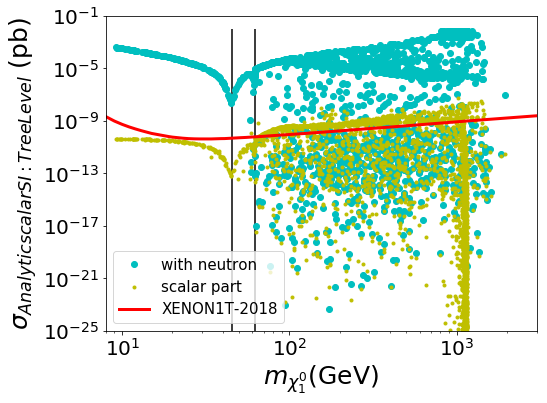

In [48]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.mChi1, xDM.NSI, 'co',label='with neutron')
plt.loglog(xDM.mChi1, xDM.NSI_scalar, 'y.',label='scalar part')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{Analytic scalar SI: Tree Level} $ (pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
plt.vlines(91.187/2., 1e-34,1e-2)
plt.vlines(125./2., 1e-34,1e-2)
plt.ylim(1e-25,1e-1)
plt.xlim(8,3e3)
plt.tight_layout()

(20, 1000.0)

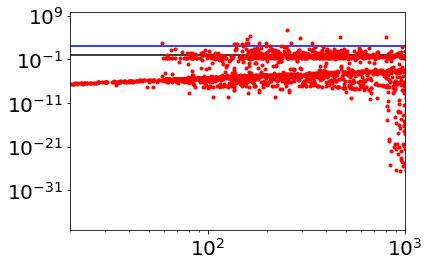

In [49]:
plt.loglog(xDM.mChi1, 0.5*xDM.NSI_scalar/xDM.NSI,'r.')
plt.hlines(1,10,1e4)
plt.hlines(1e2,10,1e4,'b')
plt.xlim(20,1e3)

warning!

### $\sigma_{SI}$ from vector interaction with $Z$

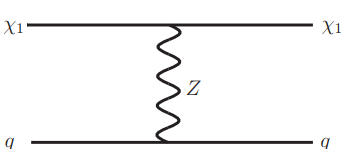

In [50]:
from IPython.display import Image
Image("vector-SI.png", width=400)

\begin{equation}
\sigma_{SI}^{A,Z} =\color{red}{2}  \dfrac{G_F^2 \mu^2}{8\pi}(\cos^2{\theta_L}+\cos^2{\theta_R})^2
\left[(1-4\sin^2\theta_W )Z-(A-Z)\right]^2
\end{equation}

https://arxiv.org/abs/1510.06151

\begin{equation}
\sigma_{SI}^{N} = \dfrac{m_N^2}{\mu^2 A^2}\sigma_{SI}^{A,Z}
\end{equation}

For NEUTRONS

In [51]:
#For the neutron
xDM['NSI_vector'] = (2./1.)*GF**2*MNn**2/(8.*np.pi*A**2)*(xDM.XV11**2+xDM.XU11**2)**2*(0.*(1.-4.*(1.- (MW/MZ)**2))*Z-(A-Z))**2*GeVtomin2topb

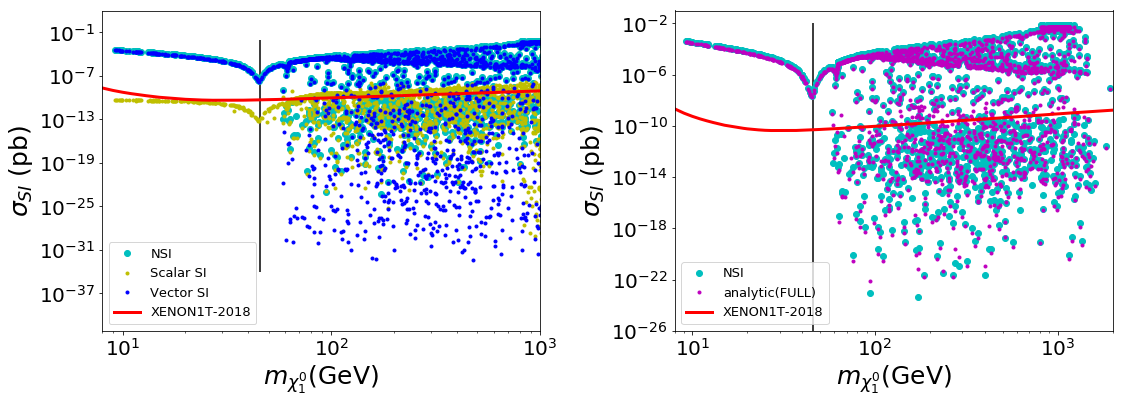

In [52]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.loglog(xDM.mChi1, xDM.NSI, 'co')
plt.loglog(xDM.mChi1, xDM.NSI_scalar, 'y.',label='Scalar SI')
plt.loglog(xDM.mChi1, xDM.NSI_vector, 'b.',label='Vector SI')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.vlines(MZ/2, 1e-34,1e-2)
plt.xlim(8,1e3)
#plt.ylim(1e-26,1e-1)

plt.subplot(1,2,2)
plt.loglog(xDM.mChi1, xDM.NSI, 'co')
plt.loglog(xDM.mChi1, (xDM.NSI_scalar + xDM.NSI_vector ), 'm.',label='analytic(FULL)')
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.vlines(MZ/2, 1e-34,1e-2)
plt.ylim(1e-26,1e-1)
plt.xlim(8,2e3)
plt.tight_layout()

In conclusion: the vector SI interaction could dominate and could exclude the model. We need to suppress this interaction, it means, that the DM needs to be singlet and the relic density is obtained by coannihilations. However, we realize that for hight mass region the scalar interaction is important. Yaguna elude (dodge) this assuming Yukawas $< 10^{-3}$

(0.5, 5)

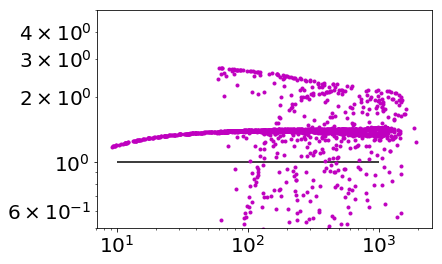

In [53]:
plt.loglog(xDM.mChi1, xDM.NSI/(xDM.NSI_scalar + xDM.NSI_vector ), 'm.',label='')
plt.hlines(1,10,1e3)

plt.ylim(0.5,5)

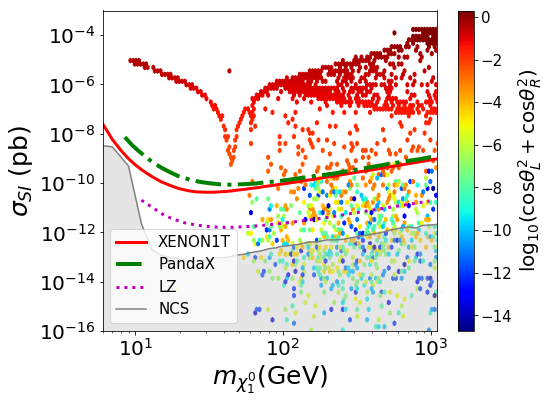

In [54]:
plt.figure(figsize=(8,6))

#plt.hexbin(xDM.mChi1, xDM.PSI, np.log10(xDM.XU11**2+xDM.XV11**2) ,xscale='log',yscale='log',gridsize=120,label='',cmap='jet' )
plt.hexbin(xd.mChi1, xd.PSI, np.log10(xd.XU11**2+xd.XV11**2) ,xscale='log',yscale='log',gridsize=120,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$\log_{10}(\cos\theta_L^2+\cos\theta_R^2)$',size=20)
ticklabs = a.ax.get_yticklabels()
a.ax.set_yticklabels(ticklabs, fontsize=15)

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T')

#plot pandaX data
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,'g-.',lw=4,label='PandaX')

#plt LZ
n=np.linspace(11,980,200)
plt.semilogy(n,LZSI(n)*1e+36,'m:',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.5,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-33,back,facecolor='silver',alpha=0.4)

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
plt.xlim(6,1.1e3)
plt.ylim(1e-16,1e-3)

plt.tight_layout()
plt.show()

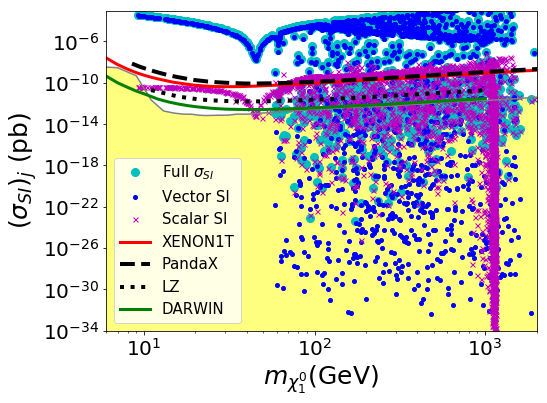

In [55]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.mChi1, xDM.NSI, 'co',ms=8,label=r'Full $\sigma_{SI}$')
plt.loglog(xDM.mChi1, xDM.NSI_vector, 'b.',ms=8,label='Vector SI')
plt.loglog(xDM.mChi1, xDM.NSI_scalar, 'mx',ms=5,label='Scalar SI')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T')

#plot pandaX data
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX')

#plt LZ
n=np.linspace(11,980,200)
plt.semilogy(n,LZSI(n)*1e+36,'k:',lw=4,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.5,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5)

# DARWIN SI
n=np.arange(6,1000)
plt.loglog(n,DARSI(n)*1e+36,'g-',lw=3,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$(\sigma_{SI})_j$ (pb)',size=25)
plt.legend(prop={'size':15},loc='best')
plt.xlim(6,2.0e3)
plt.ylim(1e-34,1e-3)

plt.tight_layout()
plt.show()

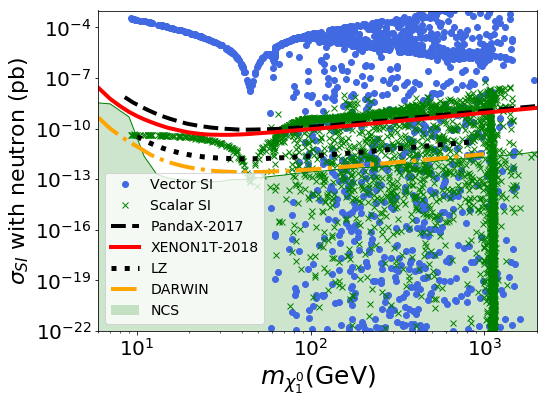

In [56]:
plt.figure(figsize=(8,6))

#plt.loglog(xDM.mChi1, xDM.PSI, color='cyan', marker='o',linestyle='', label=r'')
plt.loglog(xDM.mChi1, xDM.NSI_vector, color='royalblue', marker='o',ms=6,linestyle='',label='Vector SI')
plt.loglog(xDM.mChi1, xDM.NSI_scalar, 'gx',ms=6,label='Scalar SI')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=4,label='XENON1T-2018')

#plt LZ
n=np.arange(10,900)
plt.semilogy(n,LZSI(n)*1e+36,'k:',lw=5,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='green',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='green',alpha=0.2,label='NCS')

# DARWIN SI
n=np.arange(6,1000)
plt.loglog(n,DARSI(n)*1e+36,color='orange',linestyle='-.',lw=4,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')
plt.xlim(6,2.0e3)
plt.ylim(1e-22,1e-3)

plt.tight_layout()
plt.show()

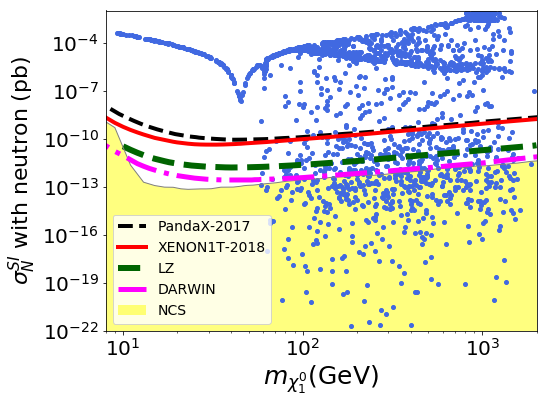

In [57]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.mChi1, xDM.NSI, color='royalblue', marker='o',ms=4,linestyle='', label=r'')
#plt.loglog(xDM.mChi1, xDM.NSI_vector, color='blue', marker='.',ms=6,linestyle='',label='Vector SI')
#plt.loglog(xDM.mChi1, xDM.NSI_scalar, 'gx',ms=6,label='Scalar SI')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=4,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=6,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=5,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')
plt.xlim(8,2.0e3)
plt.ylim(1e-22,1e-2)

plt.tight_layout()
plt.savefig('plots/SI.pdf')
#plt.show()

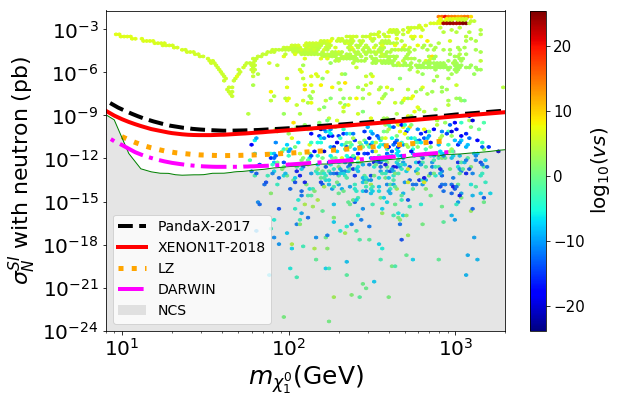

In [58]:
plt.figure(figsize=(9,6))

plt.hexbin(xDM.mChi1, xDM.NSI, np.log10(xDM.NSI_vector/xDM.NSI_scalar) ,xscale='log',\
           yscale='log',gridsize=120,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$\log_{10}(vs)$',size=20)
ticklabs = a.ax.get_yticklabels()
a.ax.set_yticklabels(ticklabs, fontsize=15)
#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=4,label='XENON1T-2018')

#plt LZ
n=np.arange(10,900)
plt.semilogy(n,LZSI(n)*1e+36,color='orange',linestyle=':',lw=5,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='green',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='grey',alpha=0.2,label='NCS')

# DARWIN SI
n=np.arange(6,1000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=4,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')
plt.xlim(8,2.0e3)
plt.ylim(1e-24,2e-2)

plt.tight_layout()
plt.show()

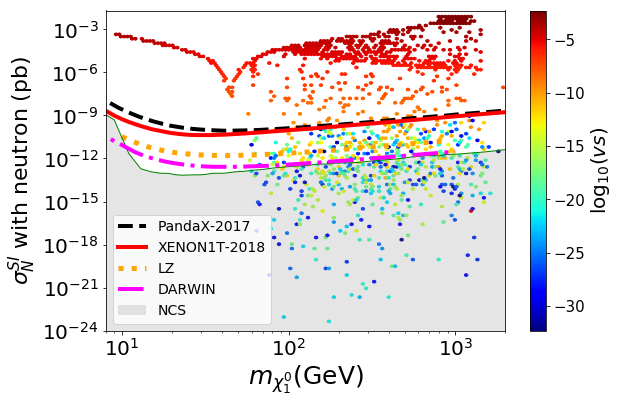

In [59]:
plt.figure(figsize=(9,6))

plt.hexbin(xDM.mChi1, xDM.NSI, np.log10(xDM.NSI_vector) ,xscale='log',\
           yscale='log',gridsize=120,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$\log_{10}(vs)$',size=20)
ticklabs = a.ax.get_yticklabels()
a.ax.set_yticklabels(ticklabs, fontsize=15)
#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=4,label='XENON1T-2018')

#plt LZ
n=np.arange(10,900)
plt.semilogy(n,LZSI(n)*1e+36,color='orange',linestyle=':',lw=5,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='green',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='grey',alpha=0.2,label='NCS')

# DARWIN SI
n=np.arange(6,1000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=4,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')
plt.xlim(8,2.0e3)
plt.ylim(1e-24,2e-2)

plt.tight_layout()
plt.show()

# Good points for SI

In [60]:
## Reset index to imput new data to the dataframe
xDM = xDM.reset_index()
del[xDM['index']]

## Compute the XENON1T limit for Chi1 as a DM particle 
y = XENON1T(xDM.mChi1)*1e+36
yd = pd.DataFrame(y,columns=['Xenon1T_SI'])

## Add to the original Dataframe
xDM['Xenon1T_SI'] = yd['Xenon1T_SI']

## Only points with SI passing XENON1T for neutron 
DD = xDM[np.logical_and(xDM.NSI < xDM.Xenon1T_SI , 0<1 )]

print(DD.shape[0],DD.shape[0]-644)

659 15


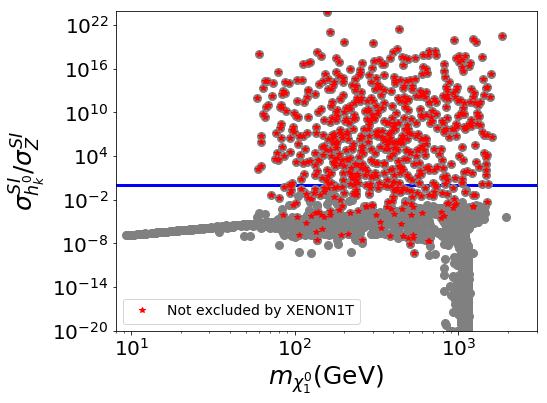

In [61]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.mChi1, xDM.NSI_scalar/xDM.NSI_vector, color='grey', marker='o', ms=8,linestyle='', label='')
plt.hlines(1,5,1e4, color='blue', lw=3)
plt.loglog(DD.mChi1, DD.NSI_scalar/DD.NSI_vector,color='red', marker='*',linestyle='',label='Not excluded by XENON1T')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma^{SI}_{h_k^0}/\sigma^{SI}_Z$',size=25)
plt.xlim(8,3e3)
plt.ylim(1e-20,1e24)
plt.legend(prop={'size':14},loc='best')

plt.tight_layout()
plt.savefig('plots/SI-ratio.pdf')
#plt.show()

# $\sigma_{SD}$

In [62]:
from scipy import interpolate

#LZ-1802.06039
names3 = ['MDM', 'LZSD']
lz = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SD-neutron-prosp-2018.csv',names=names3, header=None)
LZSD=interpolate.interp1d(lz.MDM,lz.LZSD)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SD.csv', names=names1, header=None)
DARSD=interpolate.interp1d(dd1.MDM,dd1.DAR)

#XENON SD 2019
names2 = ['MDM', 'XENON1TSD']
xeSD=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/SD-2019/neutron.csv',names=names2, header=None)
XENON1TSD=interpolate.interp1d(xeSD.MDM,xeSD.XENON1TSD)

#IC WW SD DATA
ICc_sd = ['M', 'sigmaSD']
ICsd = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_IceCube/IceCubeWW.dat')
IC_SD = pd.DataFrame(ICsd, columns=ICc_sd)

# PICO-60 y PICO-2L
pico60columns = ['M','sigmaSD']
pico60datos = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_PICO/fig12-PICO-60.dat')
PICO60_SD = pd.DataFrame(pico60datos, columns=pico60columns)

#LUX  neutrons 1705.03380
names4 = ['M', 'sigmaSD']
luxSD = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LUX/SD/LUX-SD-neutron-2017.csv',names=names4, header=None)
LUX_SD_n = interpolate.interp1d(luxSD.M, luxSD.sigmaSD)

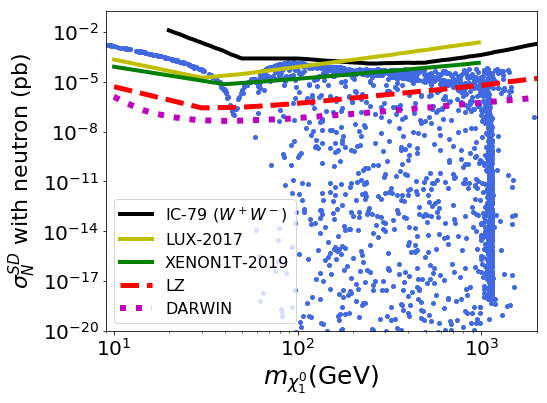

In [63]:
plt.figure(figsize=(8,6))
#For neutrons
plt.loglog(xDM.mChi1,xDM['NSD'], color='royalblue', marker='o',ms=4,linestyle='',label='')

#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=4,label=r'IC-79 ($W^+W^-$)')
#LUX-neutron
n=np.arange(10,990,20)
plt.plot(n,LUX_SD_n(n),'y',lw=4,label='LUX-2017')

#XENON1T
nx=np.arange(10,990,30)
plt.loglog(nx,XENON1TSD(nx)*1e+36,'g-',lw=4,label='XENON1T-2019')
#LZ-1802.06039
nn=np.arange(10,3000,20)
plt.loglog(nn,LZSD(nn)*1e+36,'r--',lw=5,label='LZ')

# DARWIN SD
n=np.arange(6,5000)
plt.loglog(n,DARSD(n)*1e+36,'m:',lw=6,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SD}$ with neutron (pb)',size=22)
plt.legend(prop={'size':16},loc='lower left')
plt.xlim(9,2.0e3)
plt.ylim(1e-20,2e-1)

plt.tight_layout()
plt.savefig('plots/SD.pdf')
#plt.show()

with the good points (SI $\to$ SD)

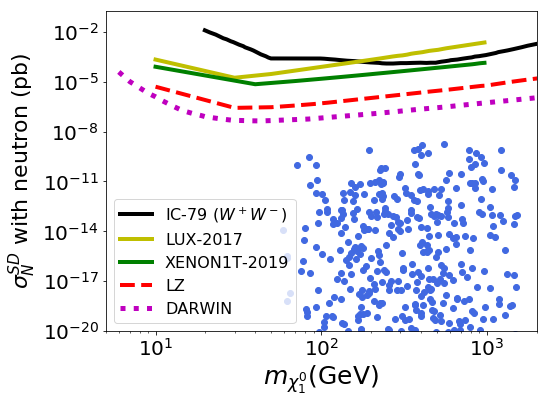

In [64]:
plt.figure(figsize=(8,6))
#For neutrons
plt.loglog(DD.mChi1,DD['NSD'], color='royalblue', marker='o',linestyle='',label='')

#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=4,label=r'IC-79 ($W^+W^-$)')
#LUX-neutron
n=np.arange(10,990,20)
plt.plot(n,LUX_SD_n(n),'y',lw=4,label='LUX-2017')

#XENON1T
nx=np.arange(10,990,30)
plt.loglog(nx,XENON1TSD(nx)*1e+36,'g-',lw=4,label='XENON1T-2019')
#LZ-1802.06039
nn=np.arange(10,3000,20)
plt.loglog(nn,LZSD(nn)*1e+36,'r--',lw=4,label='LZ')

# DARWIN SD
n=np.arange(6,5000)
plt.loglog(n,DARSD(n)*1e+36,'m:',lw=5,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SD}$ with neutron (pb)',size=22)
plt.legend(prop={'size':16},loc='lower left')
plt.xlim(5,2.0e3)
plt.ylim(1e-20,2e-1)

plt.tight_layout()
plt.show()

# $\sigma v$ today

the cut is wrong.... we need the BR

In [65]:
from indirectdirect import *

## Reset index to imput new data to the dataframe
DD = DD.reset_index()
del[DD['index']]

## Add to the original Dataframe
DD['Dwarfs_bb_sv'] = sigmav_bb_fit(DD.mChi1)

#cut the DD data
DI = DD[np.logical_and(DD.sv < DD.Dwarfs_bb_sv , 0<1)]

print(DD.shape[0],DI.shape[0])

659 642


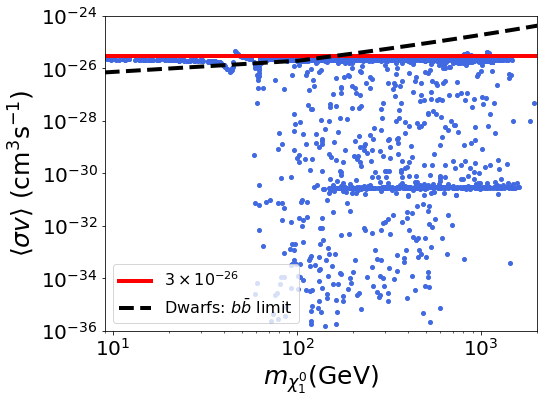

In [81]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.mChi1, xDM.sv, color='royalblue', marker='o',ms=4,linestyle='',label='')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'r',lw=4,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=4,label=r'Dwarfs: $b\bar{b}$ limit')
#plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend(prop={'size':16},loc='lower left')
plt.xlim(9,2e3)
plt.ylim(1e-36,1e-24)

plt.tight_layout()
plt.savefig('plots/sv.pdf')
#plt.show()

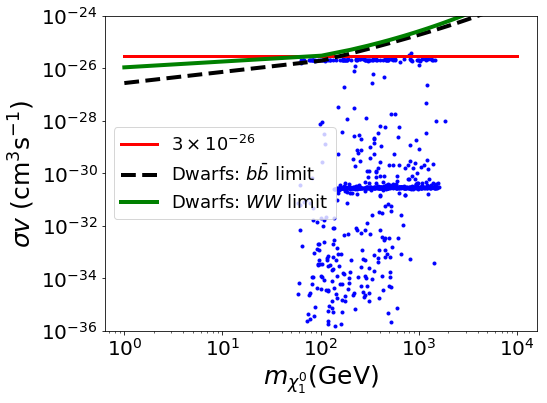

In [67]:
plt.figure(figsize=(8,6))

plt.loglog(DD.mChi1, DD.sv, color='blue', marker='.',linestyle='',label='')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'r',lw=3,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=4,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma v $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend(prop={'size':18},loc='best')
plt.ylim(1e-36,1e-24)
#plt.ylim(1e-36,1e-24)

plt.tight_layout()
plt.show()

In [68]:
DD.mChi1.min()

58.8182774

### Coannihilation

In [69]:
coan = DI[np.logical_and(np.abs(DI.mChi1-DI.mChi2)<15. , 1 >0)]

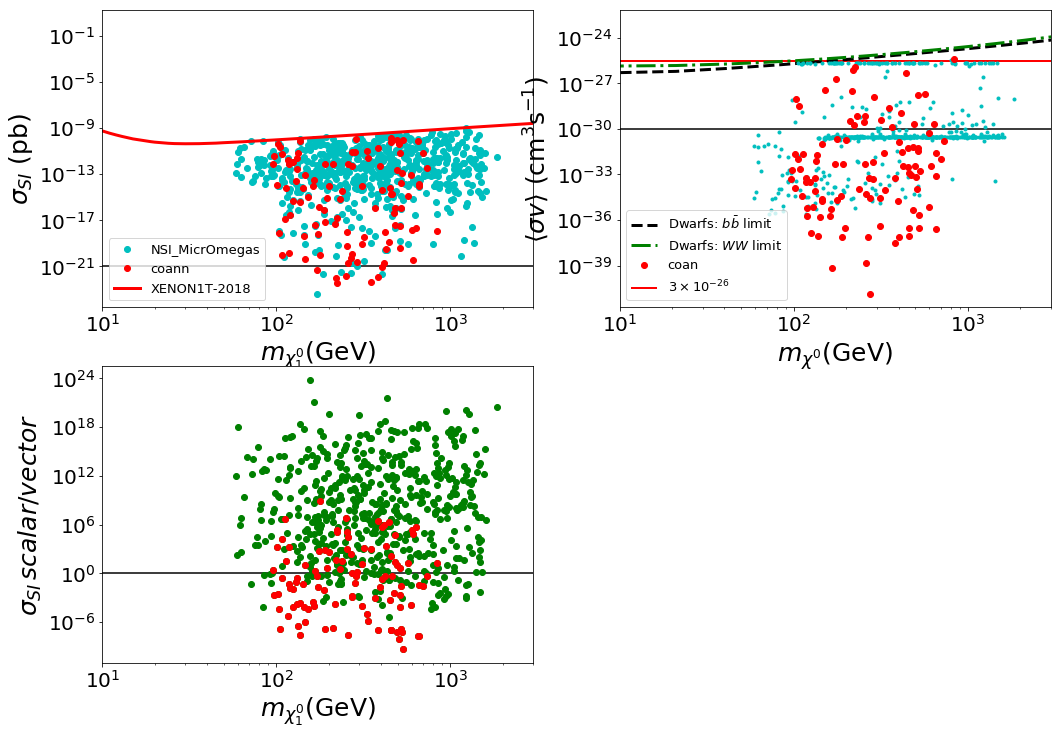

In [70]:
plt.figure(figsize=(17,12))

plt.subplot(221)
plt.loglog(DI.mChi1, DI.NSI, 'co',label='NSI_MicrOmegas')
#plt.loglog(DI.mChi1, DI.NSI_scalar , 'y.')
#plt.loglog(DI.mChi1, DI.NSI_vector , 'b.')
plt.plot(coan.mChi1, coan.NSI_vector , 'ro',label='coann')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')
plt.hlines(1e-21,6,5e3)
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.xlim(1e1,3e3)

plt.subplot(222)
plt.hlines(3e-26,1,1e4,'r',lw=2,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,500)
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-.',lw=3,label=r'Dwarfs: $WW$ limit')

plt.loglog(DI.mChi1, DI.sv , 'c.',label='')
plt.loglog(coan.mChi1, coan.sv , 'ro',label='coan')
plt.hlines(1e-30,6,5e3)
plt.legend(prop={'size':13},loc='lower left')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.xlim(1e1,3e3)

plt.subplot(223)
plt.loglog(DI.mChi1, DI.NSI_scalar/DI.NSI_vector , 'go',label='')
plt.loglog(coan.mChi1, coan.NSI_scalar/coan.NSI_vector , 'ro',label='')
plt.hlines(1.,1e1,3e3)
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI}\, scalar/vector $',size=25)
plt.xlim(1e1,3e3)

plt.show()

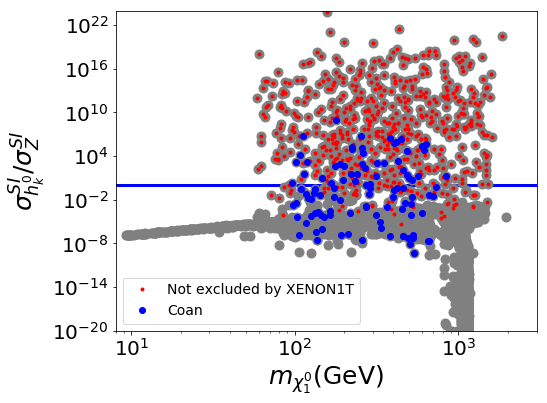

In [71]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.mChi1, xDM.NSI_scalar/xDM.NSI_vector, color='grey', marker='o', ms=9,linestyle='', label='')
plt.hlines(1,5,1e4, color='blue', lw=3)
plt.loglog(DD.mChi1, DD.NSI_scalar/DD.NSI_vector,color='red', marker='.',linestyle='',label='Not excluded by XENON1T')
plt.loglog(coan.mChi1, coan.NSI_scalar/coan.NSI_vector,color='blue', marker='o',linestyle='',label='Coan')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma^{SI}_{h_k^0}/\sigma^{SI}_Z$',size=25)
plt.xlim(8,3e3)
plt.ylim(1e-20,1e24)
plt.legend(prop={'size':14},loc='best')

plt.tight_layout()
#plt.show()

## Plot $M_{\Psi}$ vs $M_N$

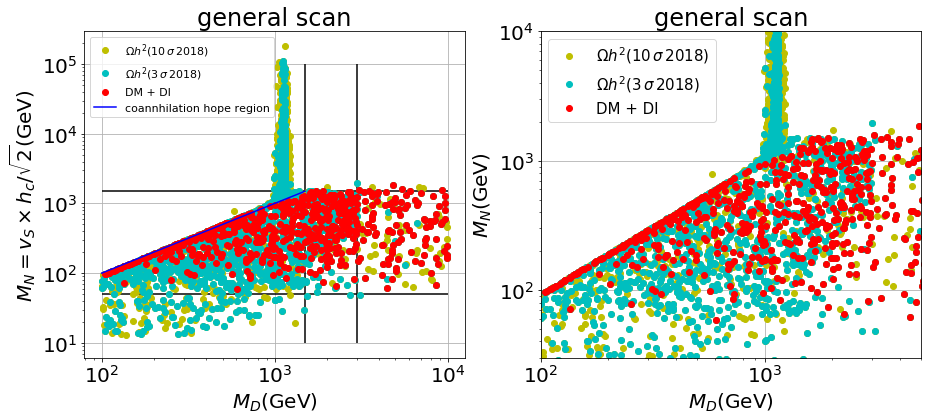

In [72]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'yo',label=r'$\Omega h^2 ( 10\,\sigma\, 2018)$')
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'co',label=r'$\Omega h^2 ( 3\,\sigma\, 2018)$')
plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro',label='DM + DI')
plt.grid()
plt.title('general scan')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=20)
plt.ylabel(r'$M_N=v_S \times h_c /\sqrt{2}$(GeV)',size=20)
m = np.linspace(1e2,1.5e3,20)
plt.plot(m, m, 'b-',label='coannhilation hope region')
plt.legend(prop={'size':11},loc='best')
plt.hlines(1.5e3,1e2,1e4)
plt.hlines(50,1e2,1e4)
plt.vlines(1.5e3,1e1,1e5)
plt.vlines(3e3,1e1,1e5)

plt.subplot(122)
plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'yo',label=r'$\Omega h^2 ( 10\,\sigma\, 2018)$')
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'co',label=r'$\Omega h^2 ( 3\,\sigma\, 2018)$')
plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro',label='DM + DI')
plt.grid()
plt.title('general scan')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=20)
plt.ylabel(r'$M_N$(GeV)',size=20)
#m = np.linspace(1e2,1.5e3,20)
#plt.plot(m, m, 'b-',label='coannhilation hope region')
plt.legend(prop={'size':15},loc='upper left')
#plt.hlines(1.5e3,1e2,1e4)
#plt.hlines(50,1e2,1e4)
#plt.vlines(1.5e3,1e1,1e5)
#plt.vlines(3e3,1e1,1e5)
plt.xlim(1e2,5e3)
plt.ylim(3e1,1e4)

plt.show()

In [73]:
%%writefile pareto.py
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y
                p_front.append(pair) # and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y
                p_front.append(pair) # and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

Overwriting pareto.py


In [74]:
from pareto import *

In [75]:
#contourns in DI dataframe
X1,Y1 = pareto_frontier(DI['MDF'].values,(DI.vS*DI.YRC/np.sqrt(2)).values,False,True)
X2,Y2 = pareto_frontier(DI['MDF'].values,(DI.vS*DI.YRC/np.sqrt(2)).values,True,True)

In [76]:
# Joint the arrays in order.
X=[]
Y=[]
for i in range(0,len(X1+X2)):
    if i < len(X1):
        m = X1[i]
        n = Y1[i]
        #print(m)
    else:
        m = X2[len(X1+X2)-i-1]
        n = Y2[len(X1+X2)-i-1]
        
    X.append(m)
    Y.append(n)
    
X3=np.asarray(X)
Y3=np.asarray(Y)

In [77]:
DI.mChi1.min()

58.8182774

In [78]:
#Dataframe
k1200 = xDM[np.logical_and(xDM.MDF >1300. , xDM.vS*xDM.YRC/np.sqrt(2) > 1000. )]

#contourns in k1200 dataframe
X4,Y4 = pareto_frontier(k1200['MDF'].values,(k1200.vS*k1200.YRC/np.sqrt(2)).values,False,True)
X5,Y5 = pareto_frontier(k1200['MDF'].values,(k1200.vS*k1200.YRC/np.sqrt(2)).values,True,True)

# Joint the arrays in order.
X=[]
Y=[]
for i in range(0,len(X4+X5)):
    if i < len(X4):
        m = X4[i]
        n = Y4[i]
        #print(m)
    else:
        m = X5[len(X4+X5)-i-1]
        n = Y5[len(X4+X5)-i-1]
        
    X.append(m)
    Y.append(n)
    
X6=np.asarray(X)
Y6=np.asarray(Y)

#Dataframe
k100 = xDM[np.logical_and(xDM.MDF <1000. , xDM.vS*xDM.YRC/np.sqrt(2) > 90. )]

X7,Y7 = pareto_frontier(k100['MDF'].values,(k100.vS*k100.YRC/np.sqrt(2)).values,False,True)

Render Latex
https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/tex_demo.html

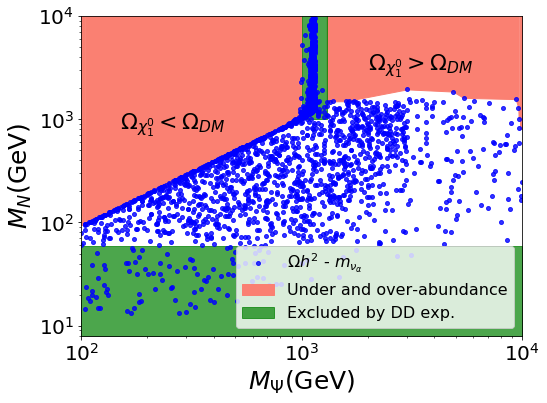

In [80]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2), color='blue', marker='o',ms=4,linestyle='', alpha=0.8, label=r'$\Omega h^2$ - $m_{\nu_\alpha}$ ')

plt.fill_between(X6, 1e5, Y6, color='salmon', alpha=1., label=r'')
plt.fill_between(X7, 1e5, Y7, color='salmon', alpha=1., label=r'')

# False REGION
c = np.linspace(9764,10000, 20)
plt.fill_between(c, 1e4, 800, color='salmon', alpha=1., label='Under and over-abundance')

c = np.linspace(90,103.5, 20)
plt.fill_between(c, 1e4, 95, color='salmon', alpha=1.0, label='')

#alive DI
#plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro', alpha=.6, ms=6, label='Viable models')

#DM legend
plt.text(150, 8.0e2, r'$\Omega_{\chi^0_1} < \Omega_{DM}$', {'color': 'k', 'fontsize': 22})
plt.text(2000, 3.0e3, r'$\Omega_{\chi^0_1} > \Omega_{DM}$', {'color': 'k', 'fontsize': 22})

#Region exclude by DI and ID
b = np.linspace(100,1e4, 10)
plt.fill_between(b, 5, DI.mChi1.min(), color='g',alpha=0.7, label='Excluded by DD exp.')
nn = np.linspace(1000,1300, 10)
plt.fill_between(nn, 1e5, 1000, color='g',alpha=0.7,visible=True, label='')

plt.legend(prop={'size':16},loc='best')
plt.xlabel(r'$M_{\Psi}$(GeV)',size=25)
plt.ylabel(r'$M_N$(GeV)',size=25)
plt.xlim(1.e2,10.e3)
plt.ylim(8,1e4)

plt.tight_layout()
plt.savefig('plots/MSvsMD.pdf')
#plt.show()

# BR($h\to\gamma\gamma$) -> Warning

In [67]:
## Reset index to imput new data to the dataframe
DD = DD.reset_index()
del[DD['index']]

In [68]:
BRhggSM = 2.75157381E-03

DD['R1'] = DD['BRh1gg']/BRhggSM
DD['R2'] = DD['BRh2gg']/BRhggSM

In [69]:
hgg = DD[np.logical_and(DD['R1'] > 0.71, DD['R1'] < 1.52)]
#hgg = kk[np.logical_and(kk['R2'] > 0.71, kk['R2'] < 1.52)]

In [70]:
print(DD.shape, hgg.shape)

(644, 71) (644, 71)


BR$(h\to \gamma\gamma) \to$ Filter a lot of points

# Export the points that past DD

In [71]:
## All the file
export_data = DD

In [72]:
## Reset index to imput new data to the dataframe
export_data = export_data.reset_index()
del[export_data['index']]

In [73]:
## Export the file to do analisys
export_data.to_csv('DM.csv')

In [74]:
# Read the file with the good DM data
DM = pd.read_csv('DM.csv')
del[DM['Unnamed: 0']]

In [75]:
print(DM.shape, xd.shape)

(644, 71) (4831, 62)


### Running the rutine again for the good points

In [236]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

import NEUTRINO2018
import neutrino_analytic3

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

Num = DM.shape[0]

#for i in range(0,Num-1):
for i in range(0,2):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MS12 = DM.MS12[i]
    MS22 = MS12
    LamS1H = DM.LamS1H[i]
    LamS2H = DM.LamS2H[i]
    LamSPH = DM.LamSPH[i]
    #mh2 = LamSP*vS -> LamS no cero
    LamS = DM.LamS[i]
    LamSP = DM.LamSP[i]
    vS = DM.vS[i]
    YRD = DM.YRD[i]
    YRC = DM.YRC[i]
    MDF = DM.MDF[i]
    
    ###  Modify the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    ###  Modify the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %DM.YRA11[i] 
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %DM.YRA12[i]   
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %DM.YRA13[i]    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %DM.YRA21[i]  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %DM.YRA22[i]     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %DM.YRA23[i]       
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %DM.YRB11[i]  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %DM.YRB12[i]       
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %DM.YRB13[i]   
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %DM.YRB21[i]   
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %DM.YRB22[i]      
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %DM.YRB23[i]      
    
    ###  Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    ### Run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        continue
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])  
     
    ###  Run micromegas and take the relic density. 
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega_with_DI_Detection') #Full
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    print("i=",i,"Omega=",Omega)
    
    ### Direct Detection: CDM-nucleon cross sections[pb]
    PSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    PSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    NSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    NSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    ### Indirect Detection: annihilation cross section vcs[cm^3/s]
    sv = eval(mo.split('annihilation cross section')[1].split()[0])  
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])   
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])
    
    ### EWPO
    T = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[17])
    ### LFV
    mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])
    taumug = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[16])
    #Scalar Higgs mixing
    ZH11 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[6])
    ZH12 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[11])
    ZH21 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[16])
    ZH22 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[21])
    
    #Higgs to two photons
    if len(SPheno_output.split('BR(hh_1 -> VP VP )'))==1:
        BRh1gg = 0.
    else:
        r = len(SPheno_output.split('BR(hh_1 -> VP VP )')[0].split())
        BRh1gg = eval(SPheno_output.split('BR(hh_1 -> VP VP )')[0].split()[r-5])

    if len(SPheno_output.split('BR(hh_2 -> VP VP )'))==1:
        BRh2gg = 0.
    else:
        r = len(SPheno_output.split('BR(hh_2 -> VP VP )')[0].split())
        BRh2gg = eval(SPheno_output.split('BR(hh_2 -> VP VP )')[0].split()[r-5])  
        
    #BR for relic density
    
    #Branchings x1x1uiUi
    x1x1u1U1 = mo.split('% ~Chi01 ~chi01 ->u1 U1')
    x1x1u2U2 = mo.split('% ~Chi01 ~chi01 ->u2 U2')
    x1x1u3U3 = mo.split('% ~Chi01 ~chi01 ->u3 U3')

    #Branchings x1x1diDi
    x1x1d1D1 = mo.split('% ~Chi01 ~chi01 ->d1 D1')
    x1x1d2D2 = mo.split('% ~Chi01 ~chi01 ->d2 D2')
    x1x1d3D3 = mo.split('% ~Chi01 ~chi01 ->d3 D3')

    #Branchings x1x1eiei
    x1x1e1E1 = mo.split('% ~Chi01 ~chi01 ->e1 E1')
    x1x1e2E2 = mo.split('% ~Chi01 ~chi01 ->e2 E2')
    x1x1e3E3 = mo.split('% ~Chi01 ~chi01 ->e3 E3')

    #Coannihilations
    xx2d1U1 = mo.split('% ~Cha ~chi02 ->d1 U1')
    xx2d2U2 = mo.split('% ~Cha ~chi02 ->d2 U2')
    xx2d3U3 = mo.split('% ~Cha ~chi02 ->d3 U3')

    xx2e1Nu1 = mo.split('% ~Cha ~chi02 ->e1 Nu1')
    xx2e2Nu2 = mo.split('% ~Cha ~chi02 ->e2 Nu2')
    xx2e3Nu3 = mo.split('% ~Cha ~chi02 ->e3 Nu3')

    #Others
    x1x1h1h1 = mo.split('% ~Chi01 ~chi01 ->h1 h1')
    x1x1h2h2 = mo.split('% ~Chi01 ~chi01 ->h2 h2')
    x1x1h1h2 = mo.split('% ~Chi01 ~chi01 ->h1 h2')
    x1x1gg = mo.split('% ~Chi01 ~chi01 ->g g')
    x1x1ww = mo.split('% ~Chi01 ~chi01 ->Wp Wm') 
    x1x1ZZ = mo.split('% ~Chi01 ~chi01 ->Z Z')
    xxww = mo.split('% ~Cha ~cha ->Wp Wm')
    x2x2ww = mo.split('% ~Chi02 ~chi02 ->Wp Wm')
    
    #Branchings x1x1uiUi
    if len(x1x1u1U1) == 2:
        BRx1x1du1U1 = eval(x1x1u1U1[0].split()[len(x1x1u1U1[0].split())-1])
    else:
        BRx1x1u1U1 = 0.0

    if len(x1x1u2U2) == 2:
        BRx1x1u2U2 = eval(x1x1u2U2[0].split()[len(x1x1u2U2[0].split())-1])
    else:
        BRx1x1u2U2 = 0.0

    if len(x1x1u3U3) == 2:
        BRx1x1u3U3 = eval(x1x1u3U3[0].split()[len(x1x1u3U3[0].split())-1])
    else:
        BRx1x1u3U3 = 0.0

    #Branchings x1x1diDi
    if len(x1x1d1D1) == 2:
        BRx1x1d1D1 = eval(x1x1d1D1[0].split()[len(x1x1d1D1[0].split())-1])
    else:
        BRx1x1d1D1 = 0.0

    if len(x1x1d2D2) == 2:
        BRx1x1d2D2 = eval(x1x1d2D2[0].split()[len(x1x1d2D2[0].split())-1])
    else:
        BRx1x1d2D2 = 0.0

    if len(x1x1d3D3) == 2:
        BRx1x1d3D3 = eval(x1x1d3D3[0].split()[len(x1x1d3D3[0].split())-1])
    else:
        BRx1x1d3D3 = 0.0    
    
    #Branchings x1x1eiEi
    if len(x1x1e1E1) == 2:
        BRx1x1e1E1 = eval(x1x1e1E1[0].split()[len(x1x1e1E1[0].split())-1])
    else:
        BRx1x1e1E1 = 0.0

    if len(x1x1e2E2) == 2:
        BRx1x1e2E2 = eval(x1x1e2E2[0].split()[len(x1x1e2E2[0].split())-1])
    else:
        BRx1x1e2E2 = 0.0

    if len(x1x1e3E3) == 2:
        BRx1x1e3E3 = eval(x1x1e3E3[0].split()[len(x1x1e3E3[0].split())-1])
    else:
        BRx1x1e3E3 = 0.0       

    #Branchings xx2d1Ui
    if len(xx2d1U1) == 2:
        BRxx2d1U1 = eval(xx2d1U1[0].split()[len(xx2d1U1[0].split())-1])
    else:
        BRxx2d1U1 = 0.0

    if len(xx2d2U2) == 2:
        BRxx2d2U2 = eval(xx2d2U2[0].split()[len(xx2d2U2[0].split())-1])
    else:
        BRxx2d2U2 = 0.0

    if len(xx2d3U3) == 2:
        BRxx2d3U3 = eval(xx2d3U3[0].split()[len(xx2d3U3[0].split())-1])
    else:
        BRxx2d3U3 = 0.0   

    if len(xx2e1Nu1) == 2:
        BRxx2e1Nu1 = eval(xx2e1Nu1[0].split()[len(xx2e1Nu1[0].split())-1])
    else:
        BRxx2e1Nu1 = 0.0    

    if len(xx2e2Nu2) == 2:
        BRxx2e2Nu2 = eval(xx2e2Nu2[0].split()[len(xx2e2Nu2[0].split())-1])
    else:
        BRxx2e2Nu2 = 0.0 

    if len(xx2e3Nu3) == 2:
        BRxx2e3Nu3 = eval(xx2e3Nu3[0].split()[len(xx2e3Nu3[0].split())-1])
    else:
        BRxx2e3Nu3 = 0.0 

    #Others 
    if len(x1x1h1h1) == 2:
        BRx1x1h1h1 = eval(x1x1h1h1[0].split()[len(x1x1h1h1[0].split())-1])
    else:
        BRx1x1h1h1 = 0.0 

    if len(x1x1h2h2) == 2:
        BRx1x1h2h2 = eval(x1x1h2h2[0].split()[len(x1x1h2h2[0].split())-1])
    else:
        BRx1x1h2h2 = 0.0     

    if len(x1x1h1h2) == 2:
        BRx1x1h1h2 = eval(x1x1h1h2[0].split()[len(x1x1h1h2[0].split())-1])
    else:
        BRx1x1h1h2 = 0.0           

    if len(x1x1gg) == 2:
        BRx1x1gg = eval(x1x1gg[0].split()[len(x1x1gg[0].split())-1])
    else:
        BRx1x1gg = 0.0      

    if len(x1x1ww) == 2:
        BRx1x1ww = eval(x1x1ww[0].split()[len(x1x1ww[0].split())-1])
    else:
        BRx1x1ww = 0.0    

    if len(x1x1ZZ) == 2:
        BRx1x1ZZ = eval(x1x1ZZ[0].split()[len(x1x1ZZ[0].split())-1])
    else:
        BRx1x1ZZ = 0.0    

    if len(xxww) == 2:
        BRxxww = eval(xxww[0].split()[len(xxww[0].split())-1])
    else:
        BRxxww = 0.0 

    if len(x2x2ww) == 2:
        BRx2x2ww = eval(x2x2ww[0].split()[len(x2x2ww[0].split())-1])
    else:
        BRx2x2ww = 0.0      
 
    Xf = eval(mo.split('Xf=')[1].split()[0])
    vsigmaeff =  eval(mo.split('vsigmaeff =')[1].split()[0])
        
    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,\
              mChi1,mChi2,XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM,Omega,PSI,PSD,NSI,NSD,T,S,U,mueg,\
              taumug,sv,ZH11,ZH12,ZH21,ZH22,BRh1gg,BRh2gg,BRx1x1u1U1, BRx1x1u2U2, BRx1x1u3U3,BRx1x1d1D1,\
              BRx1x1d2D2, BRx1x1d3D3,BRx1x1e1E1, BRx1x1e2E2, BRx1x1e3E3,BRxx2d1U1, BRxx2d2U2,\
              BRxx2d3U3,BRxx2e1Nu1, BRxx2e2Nu2, BRxx2e3Nu3,BRx1x1h1h1, BRx1x1h2h2, BRx1x1h1h2, BRx1x1gg,\
              BRx1x1ww, BRx1x1ZZ, BRxxww, BRx2x2ww, Xf, vsigmaeff])
    
x=np.asarray(x)
xd2=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD',\
                           'YRC','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha','mChi1','mChi2',\
                            'XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM','Omega',\
                            'PSI','PSD','NSI','NSD','T','S','U','mueg','taumug','sv','ZH11','ZH12','ZH21',\
                            'ZH22','BRh1gg','BRh2gg','BRx1x1u1U1','BRx1x1u2U2','BRx1x1u3U3','BRx1x1d1D1',\
                            'BRx1x1d2D2', 'BRx1x1d3D3','BRx1x1e1E1', 'BRx1x1e2E2', 'BRx1x1e3E3','BRxx2d1U1',\
                            'BRxx2d2U2','BRxx2d3U3','BRxx2e1Nu1', 'BRxx2e2Nu2', 'BRxx2e3Nu3','BRx1x1h1h1',\
                            'BRx1x1h2h2', 'BRx1x1h1h2','BRx1x1gg','BRx1x1ww', 'BRx1x1ZZ', 'BRxxww', 'BRx2x2ww',\
                            'Xf', 'vsigmaeff'])

t4=time.time() 
print ("The program spent", t4-t1, "s running",i,"times")

i= 0 Omega= 0.12
i= 1 Omega= 0.12
i= 2 Omega= 0.12
i= 3 Omega= 0.118
i= 4 Omega= 0.118
i= 5 Omega= 0.116
i= 6 Omega= 0.119
i= 7 Omega= 0.12
i= 8 Omega= 0.115
i= 9 Omega= 0.117
i= 10 Omega= 0.121
i= 11 Omega= 0.118
i= 12 Omega= 0.12
i= 13 Omega= 0.118
i= 14 Omega= 0.122
i= 15 Omega= 0.116
i= 16 Omega= 0.115
i= 17 Omega= 0.116
i= 18 Omega= 0.121
i= 19 Omega= 0.121
i= 20 Omega= 0.122
i= 21 Omega= 0.116
i= 22 Omega= 0.12
i= 23 Omega= 0.119
i= 24 Omega= 0.122
i= 25 Omega= 0.123
i= 26 Omega= 0.115
i= 27 Omega= 0.115
i= 28 Omega= 0.116
i= 29 Omega= 0.115
i= 30 Omega= 0.116
i= 31 Omega= 0.124
i= 32 Omega= 0.122
i= 34 Omega= 0.119
i= 35 Omega= 0.118
i= 36 Omega= 0.115
i= 38 Omega= 0.115
i= 39 Omega= 0.115
i= 40 Omega= 0.121
i= 41 Omega= 0.118
i= 42 Omega= 0.117
i= 43 Omega= 0.123
i= 44 Omega= 0.118
i= 45 Omega= 0.118
i= 46 Omega= 0.12
i= 47 Omega= 0.123
i= 48 Omega= 0.118
i= 49 Omega= 0.12
i= 50 Omega= 0.123
i= 51 Omega= 0.118
i= 52 Omega= 0.117
i= 53 Omega= 0.115
i= 54 Omega= 0.118
i= 55 Omega

i= 458 Omega= 0.118
i= 459 Omega= 0.12
i= 460 Omega= 0.117
i= 461 Omega= 0.117
i= 462 Omega= 0.115
i= 463 Omega= 0.121
i= 464 Omega= 0.124
i= 465 Omega= 0.124
i= 466 Omega= 0.117
i= 467 Omega= 0.118
i= 468 Omega= 0.122
i= 469 Omega= 0.123
i= 470 Omega= 0.115
i= 471 Omega= 0.12
i= 472 Omega= 0.116
i= 473 Omega= 0.115
i= 474 Omega= 0.124
i= 475 Omega= 0.115
i= 476 Omega= 0.119
i= 477 Omega= 0.118
i= 478 Omega= 0.119
i= 479 Omega= 0.123
i= 480 Omega= 0.12
i= 481 Omega= 0.118
i= 482 Omega= 0.122
i= 483 Omega= 0.122
i= 484 Omega= 0.124
i= 485 Omega= 0.115
i= 486 Omega= 0.117
i= 489 Omega= 0.124
i= 490 Omega= 0.115
i= 491 Omega= 0.116
i= 492 Omega= 0.117
i= 493 Omega= 0.116
i= 494 Omega= 0.117
i= 496 Omega= 0.118
i= 498 Omega= 0.121
i= 500 Omega= 0.121
i= 501 Omega= 0.124
i= 502 Omega= 0.115
The program spent 5729.9811363220215 s running 502 times


In [81]:
kk = xd2[np.logical_and(xd2['BRx1x1h2h2'] >90, 1>0)]

In [239]:
kk[['YRC','YRD','ZH11','ZH12','mChi1','mChi2','mCha','mh1','mh2','BRx1x1h2h2','Xf','vsigmaeff','Omega','sv']][:5]

,YRC,YRD,ZH11,ZH12,mChi1,mChi2,mCha,mh1,mh2,BRx1x1h2h2,Xf,vsigmaeff,Omega,sv
1,0.892471,0.014672,0.991536,-0.129833,177.927598,1979.86474,1979.86310,124.695943,134.188988,97.0,26.5,3.589000e-26,0.120,2.770000e-31
2,0.943000,0.050577,0.999995,-0.003040,136.130999,4499.94013,4499.93160,124.861825,137.397589,100.0,26.5,4.483000e-26,0.120,4.220000e-35
5,0.966125,0.000192,0.999992,-0.003994,199.735482,1679.44400,1679.44400,124.861005,174.167281,100.0,26.5,3.754000e-26,0.116,2.900000e-31
6,0.904858,0.003182,0.999997,-0.002481,180.038336,929.00905,929.00888,124.861776,150.087491,100.0,26.5,3.621000e-26,0.119,2.800000e-31
8,0.868941,0.148893,0.999999,-0.001466,160.189384,5163.27883,5163.21440,124.861902,144.424791,100.0,26.4,3.749000e-26,0.115,2.870000e-31


In [240]:
mo.splitlines()

['',
 'Masses of odd sector Particles:',
 '~Chi : MChi01=   458.4 || ~Cha : MCha  =  1170.5 || ~Chi : MChi02=  1170.5 ',
 '~Ssc : MSsc1 =  3917.5 || ~Ssc : MSsc2 =  3917.5 || ',
 '',
 'vsigmaeff = 3.940e-26',
 'Xf=2.69e+01 Omega h^2=1.15e-01',
 '',
 '# Channels which contribute to 1/(omega) more than 1%.',
 '# Relative contributions in % are displayed',
 '  100% ~Chi01 ~chi01 ->h2 h2 ',
 '',
 '======== Direct Detection ========',
 '',
 '==== Calculation of CDM-nucleons amplitudes  =====',
 '         TREE LEVEL',
 'CDM-nucleon micrOMEGAs amplitudes:',
 'proton:  SI  -1.071E-10  SD  7.035E-19',
 'neutron: SI  -1.088E-10  SD  -6.152E-19',
 '         BOX DIAGRAMS',
 'CDM-nucleon micrOMEGAs amplitudes:',
 'proton:  SI  -1.071E-10  SD  7.035E-19',
 'neutron: SI  -1.088E-10  SD  -6.152E-19',
 'CDM-nucleon cross sections[pb]:',
 ' proton  SI 4.996E-12  SD 6.464E-28',
 ' neutron SI 5.152E-12  SD 4.942E-28',
 '',
 '==== Indirect detection =======',
 '    Channel          vcs[cm^3/s]',
 '========

In [242]:
# All good points
#xd2.to_csv('DM2.csv')

In [243]:
3245./3600

0.9013888888888889

In [76]:
# Read the file with the good DM data
xd2 = pd.read_csv('DM2.csv')
del[xd2['Unnamed: 0']]

In [77]:
print(DM.shape, xd2.shape)

(644, 71) (458, 72)


In [78]:
print(BRx1x1u1U1, BRx1x1u2U2, BRx1x1u3U3)
print(BRx1x1d1D1, BRx1x1d2D2, BRx1x1d3D3)
print(BRx1x1e1E1, BRx1x1e2E2, BRx1x1e3E3) 
print(BRxx2d1U1, BRxx2d2U2, BRxx2d3U3)
print(BRxx2e1Nu1, BRxx2e2Nu2, BRxx2e3Nu3)
print(BRx1x1h1h1, BRx1x1h2h2, BRx1x1h1h2, BRx1x1gg, BRx1x1ww, BRx1x1ZZ, BRxxww, BRx2x2ww)

NameError: name 'BRx1x1u1U1' is not defined

In [79]:
#Sum
xd2['BRS'] = xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3+xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3+xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3+xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3+xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3+xd2.BRx1x1h1h1+xd2.BRx1x1h2h2+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww  

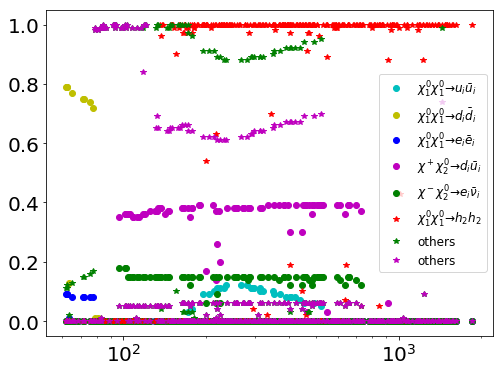

In [80]:
plt.figure(figsize=(8,6))
plt.semilogx(xd2.mChi1, (xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3)/100.,'co',label=r'$\chi_1^0\chi_1^0\to u_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3)/100.,'yo',label=r'$\chi_1^0\chi_1^0\to d_i\bar{d}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3)/100.,'bo',label=r'$\chi_1^0\chi_1^0\to e_i\bar{e}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)/100.,'mo',label=r'$\chi^+\chi_2^0\to d_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3)/100.,'go',label=r'$\chi^-\chi_2^0\to e_i\bar{\nu}_i$')

plt.semilogx(xd2.mChi1, xd2.BRx1x1h2h2/100.,'r*',label=r'$\chi_1^0\chi_1^0\to h_2h_2$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1h1h1+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww)/100.,'g*',label=r'others')
plt.semilogx(xd2.mChi1, (xd2.BRxxww+xd2.BRx2x2ww+xd2.BRx1x1ww+xd2.BRx1x1ZZ)/100.,'m*',label=r'others')
#plt.semilogx(xd2.mChi1, xd2.BRS/100.,'k*',label=r'$\Sigma$')
plt.legend(prop={'size':12},loc='best')
plt.show()

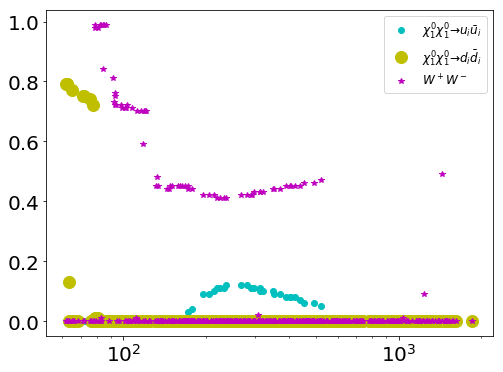

In [279]:
plt.figure(figsize=(8,6))
plt.semilogx(xd2.mChi1, (xd2.BRx1x1u3U3)/100.,'co',label=r'$\chi_1^0\chi_1^0\to u_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1d3D3)/100.,'yo', ms=12,label=r'$\chi_1^0\chi_1^0\to d_i\bar{d}_i$')

plt.semilogx(xd2.mChi1, (xd2.BRx1x1ww)/100.,'m*',label=r'$W^+W^-$')

plt.legend(prop={'size':12},loc='best')
plt.show()

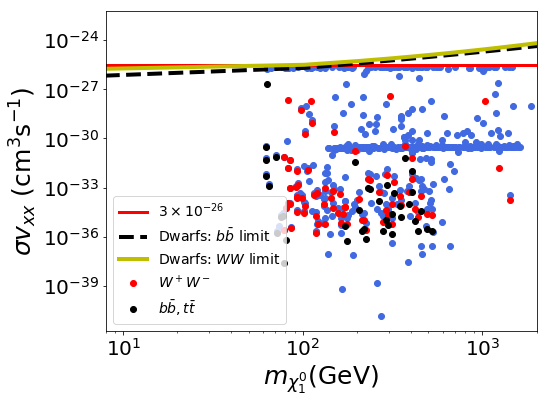

In [306]:
plt.figure(figsize=(8,6))

plt.semilogx(DD.mChi1, DD.sv, color='royalblue', marker='o',linestyle='',label='')

##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'r',lw=3,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=4,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'y-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.loglog(xd2.mChi1, xd2.sv*(xd2.BRx1x1ww)/100., color='red', marker='o',linestyle='',label=r'$W^+W^-$')
plt.loglog(xd2.mChi1, xd2.sv*(xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3\
                              +xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3)/100.,\
           color='black', marker='o',linestyle='',label=r'$b\bar{b}, t\bar{t}$')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma v_{xx} $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend(prop={'size':14},loc='best')
plt.xlim(8,2e3)
#plt.ylim(1e-36,1e-24)

plt.tight_layout()
plt.show()

We check that DM decay into neutrinos can gives the relic density in the early universe. It gives $100\%$ points 180 of xDM

In [86]:
#h2 = xd2[np.logical_and(xd2.BRx1x1h2h2 >80, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)> 20)]
h2 = xd2[np.logical_and(xd2.BRx1x1h2h2 >80, 1>0)]

In [87]:
print(xd2.shape[0], h2.shape[0])

458 229


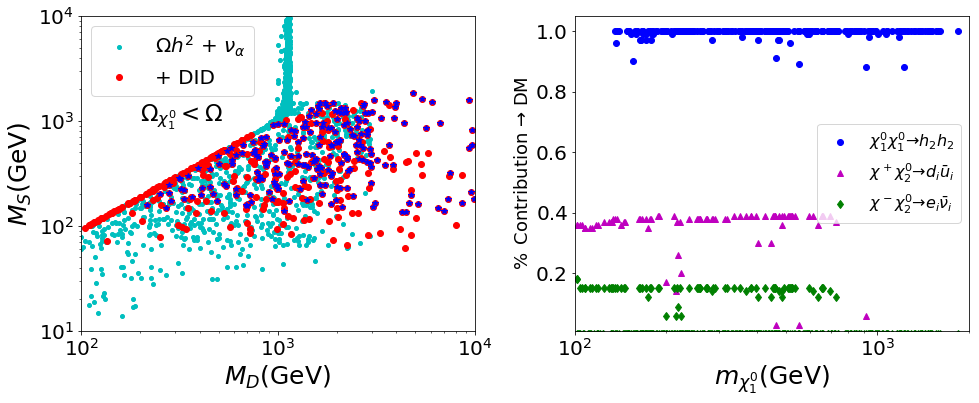

In [308]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'co',markersize=4,label=r'$\Omega h^2$ + $\nu_\alpha$ ')
plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro',label=r'+ DID')
plt.loglog(h2.MDF, h2.vS*h2.YRC/np.sqrt(2),'b*',label=r'')

#point
plt.text(200, 1.0e3, r'$\Omega_{\chi^0_1} < \Omega$', {'color': 'k', 'fontsize': 23})

#plt.grid()
#plt.title('general scan')
plt.legend(prop={'size':20},loc='upper left')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_S$(GeV)',size=25)
plt.xlim(1e2,10e3)
plt.ylim(1e1,1e4)

plt.subplot(122)

plt.semilogx(h2.mChi1, h2.BRx1x1h2h2/100.,'bo',label=r'$\chi_1^0\chi_1^0\to h_2h_2$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)/100.,'m^',label=r'$\chi^+\chi_2^0\to d_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3)/100.,'gd',label=r'$\chi^-\chi_2^0\to e_i\bar{\nu}_i$')

#plt.grid()
plt.legend(prop={'size':16},loc='best')
plt.xlabel(r'$m_{\chi_1^0}$(GeV)',size=25)
plt.ylabel(r'$\%\,$ Contribution $\to$ DM',size=18)
plt.xlim(1e2,2e3)
plt.ylim(0.01,1.05)

plt.tight_layout()
plt.show()

# Improving the scan $\to$ kk

In [81]:
kk = DD

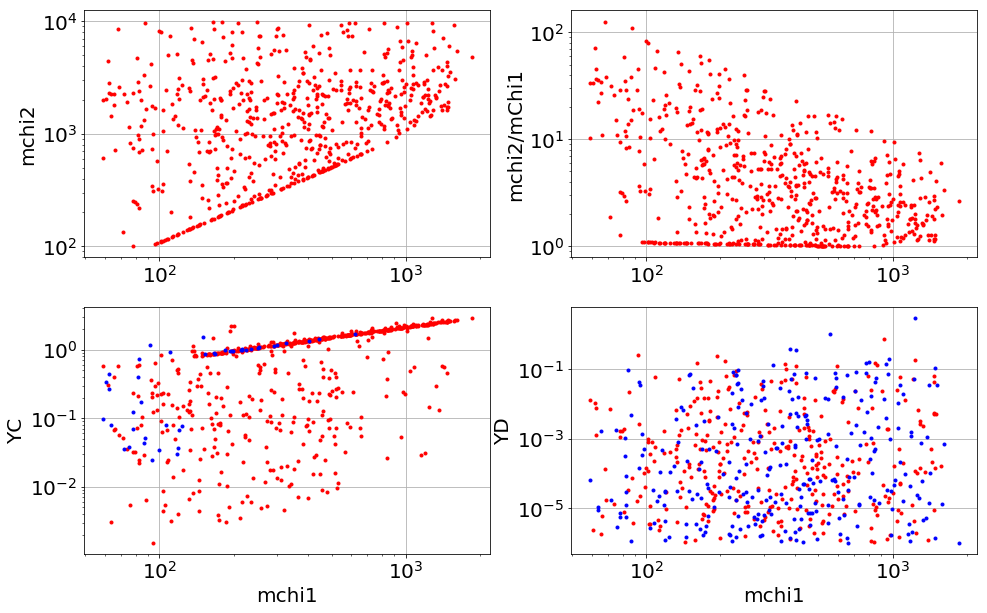

In [82]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.mChi2, 'r.')
plt.grid()
#plt.xlabel('mchi1')
plt.ylabel('mchi2')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.mChi2/kk.mChi1, 'r.')
plt.grid()
#plt.xlabel('mchi1')
plt.ylabel('mchi2/mChi1')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.YRC, 'r.')
plt.loglog(kk.mChi1, -kk.YRC, 'b.')
plt.grid()
plt.xlabel('mchi1')
plt.ylabel('YC')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.YRD, 'r.')
plt.loglog(kk.mChi1, -kk.YRD, 'b.')
plt.grid()
plt.xlabel('mchi1')
plt.ylabel('YD')

plt.show()

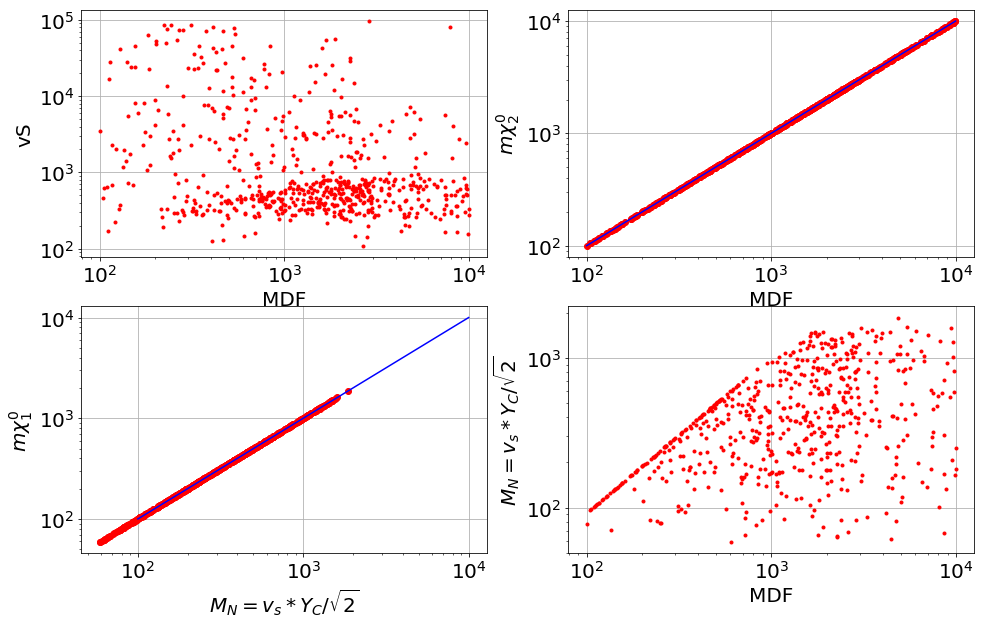

In [83]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.MDF, kk.vS, 'r.')
plt.grid()
plt.xlabel('MDF')
plt.ylabel('vS')

plt.subplot(222)
plt.loglog(kk.MDF, kk.mChi2, 'ro')
plt.grid()
plt.xlabel('MDF')
plt.ylabel(r'$m\chi_2^0$')
m = np.linspace(1e2,1e4,20)
plt.plot(m, m, 'b-')

plt.subplot(223)
plt.loglog(kk.vS*np.abs(kk.YRC)/np.sqrt(2), kk.mChi1, 'ro')
plt.plot(m, m, 'b-')
plt.grid()
plt.xlabel(r'$M_N = v_s*Y_C/\sqrt{2}$')
plt.ylabel(r'$m\chi_1^0$')

plt.subplot(224)
plt.loglog(kk.MDF,kk.vS*kk.YRC/np.sqrt(2), 'r.')
plt.grid()
plt.ylabel(r'$M_N = v_s*Y_C/\sqrt{2}$')
plt.xlabel('MDF')

plt.show()

DM is singlet a to 3 TeV... The Doublet peack is excluded

Low mixing in the neutral fermion sector

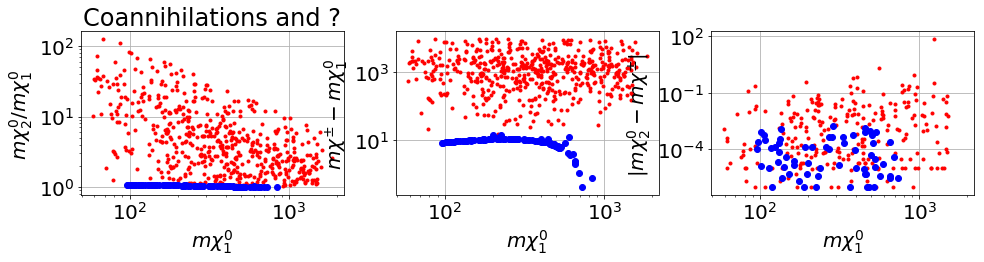

In [84]:
plt.figure(figsize=(16,3))

plt.subplot(131)
plt.loglog(kk.mChi1, kk.mChi2/kk.mChi1, 'r.')
plt.loglog(coan.mChi1, coan.mChi2/coan.mChi1, 'bo')
plt.grid()
plt.title('Coannihilations and ?')
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'$m\chi_2^0/m\chi_1^0$ ')

plt.subplot(132)
plt.loglog(kk.mChi1, kk.mCha-kk.mChi1, 'r.')
plt.loglog(coan.mChi1, coan.mCha-coan.mChi1, 'bo')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'$m\chi^{\pm}-m\chi_1^0$ ')

plt.subplot(133)
plt.loglog(kk.mChi1, np.abs(kk.mChi2-kk.mCha), 'r.')
plt.loglog(coan.mChi1, np.abs(coan.mChi2-coan.mCha), 'bo')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'$|m\chi_2^0-m\chi^{\pm}|$ ')

plt.show()

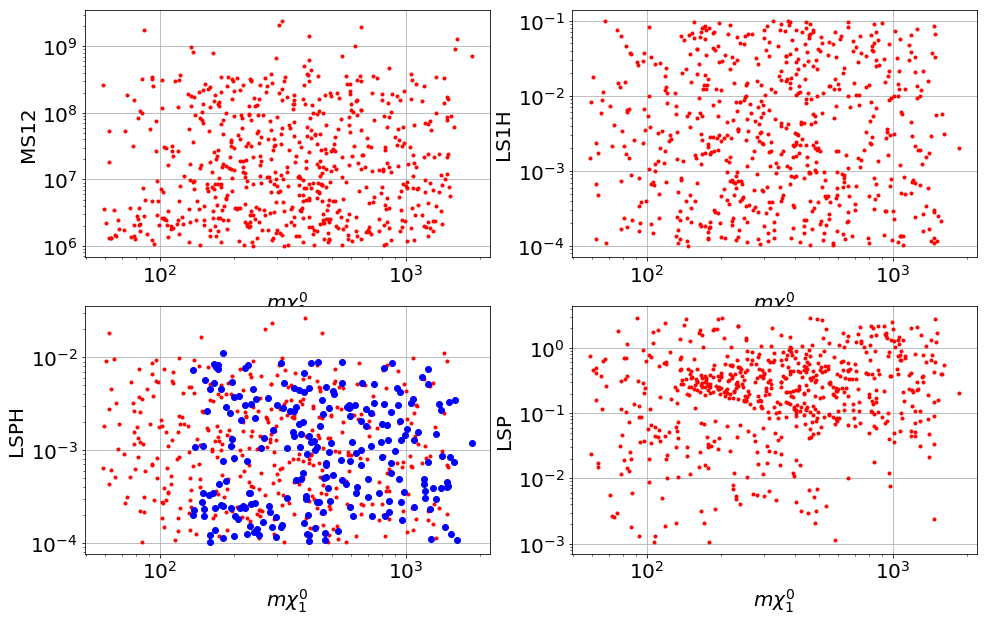

In [87]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.MS12, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'MS12')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.LamS1H, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LS1H')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.LamSPH, 'r.')
plt.loglog(h2.mChi1, h2.LamSPH, 'bo')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LSPH')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.LamSP, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LSP')

plt.show()

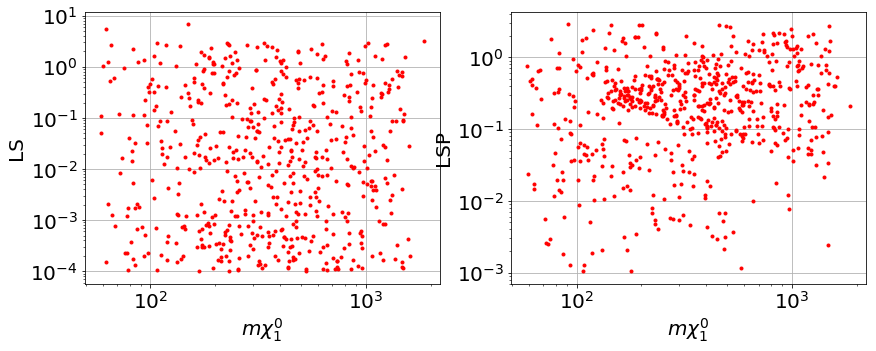

In [88]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.loglog(kk.mChi1, kk.LamS, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LS')

plt.subplot(1,2,2)
plt.loglog(kk.mChi1, kk.LamSP, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LSP')
plt.show()

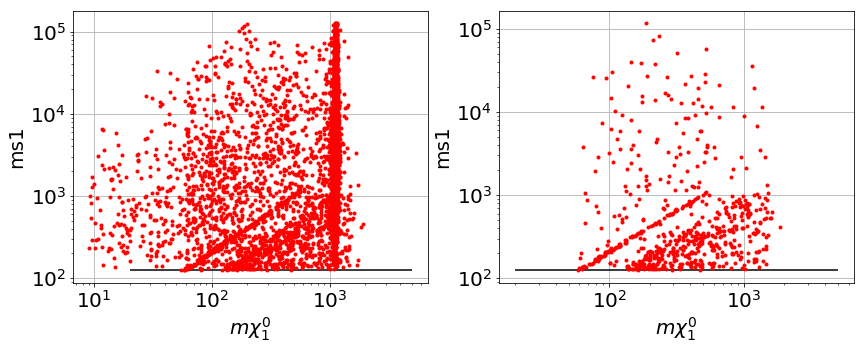

In [89]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.loglog(xd.mChi1, xd.mh2, 'r.')
plt.hlines(125,20,5e3)
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'ms1')


plt.subplot(1,2,2)
plt.loglog(kk.mChi1, kk.mh2, 'r.')
plt.hlines(125,20,5e3)
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'ms1')
plt.show()

# $Ya_{si}$ -> Random

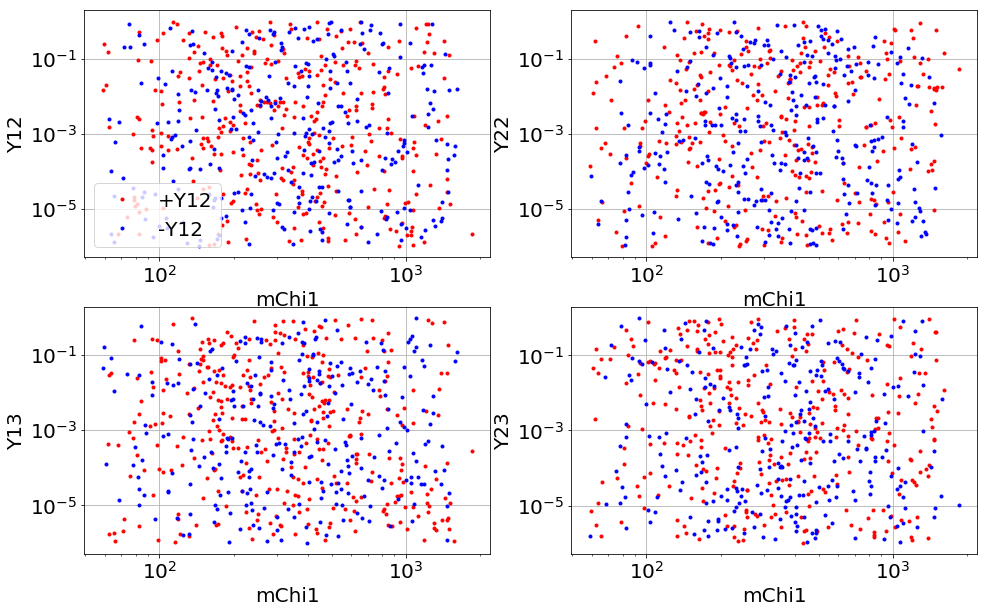

In [90]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.YRA12, 'r.',label='+Y12')
plt.loglog(kk.mChi1, -kk.YRA12, 'b.',label='-Y12')
plt.grid()
plt.legend()
plt.xlabel('mChi1')
plt.ylabel(r'Y12')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.YRA22, 'r.')
plt.loglog(kk.mChi1, -kk.YRA22, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y22')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.YRA13, 'r.')
plt.loglog(kk.mChi1, -kk.YRA13, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y13')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.YRA23, 'r.')
plt.loglog(kk.mChi1, -kk.YRA23, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y23')

plt.show()

# $Yb_{si}$

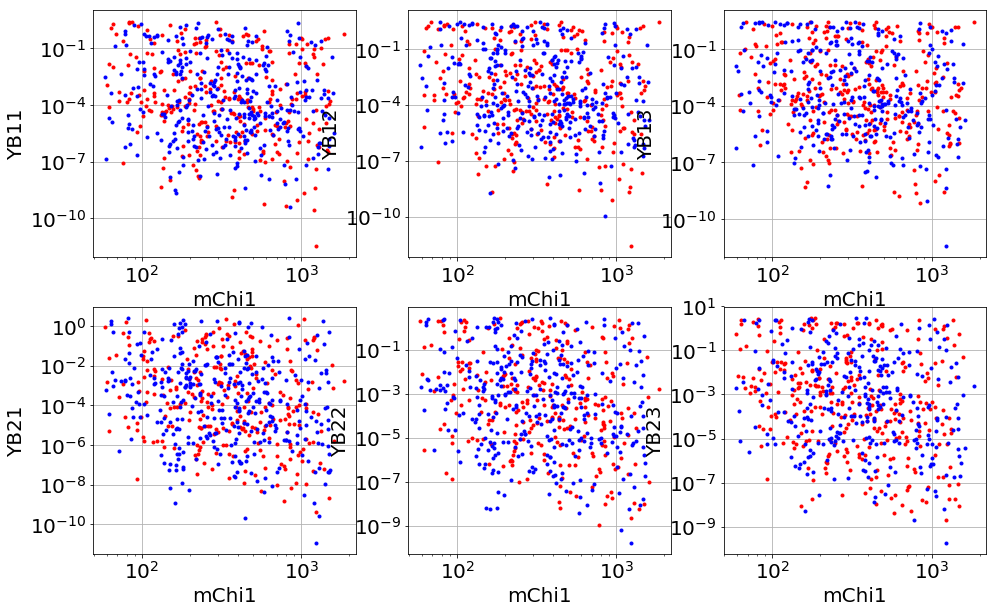

In [91]:
plt.figure(figsize=(16,10))

plt.subplot(231)
plt.loglog(kk.mChi1, kk.YRB11, 'r.')
plt.loglog(kk.mChi1,-kk.YRB11, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB11')

plt.subplot(232)
plt.loglog(kk.mChi1, kk.YRB12, 'r.')
plt.loglog(kk.mChi1,-kk.YRB12, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB12')

plt.subplot(233)
plt.loglog(kk.mChi1, kk.YRB13, 'r.')
plt.loglog(kk.mChi1,-kk.YRB13, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB13')

plt.subplot(234)
plt.loglog(kk.mChi1, kk.YRB21, 'r.')
plt.loglog(kk.mChi1,-kk.YRB21, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB21')

plt.subplot(235)
plt.loglog(kk.mChi1, kk.YRB22, 'r.')
plt.loglog(kk.mChi1,-kk.YRB22, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB22')

plt.subplot(236)
plt.loglog(kk.mChi1, kk.YRB23, 'r.')
plt.loglog(kk.mChi1,-kk.YRB23, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB23')

plt.show()

In [92]:
kk[['XV11', 'XV12', 'XV21', 'XV22', 'XU11', 'XU12', 'XU21', 'XU22', 'PSD', 'NSD', 'T', 'S', 'U', 'taumug',
       'ZH11', 'ZH12', 'ZH21', 'ZH22', 'BRh1gg', 'BRh2gg']][:3]

,XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,PSD,NSD,T,S,U,taumug,ZH11,ZH12,ZH21,ZH22,BRh1gg,BRh2gg
0,0.000032,-1.0,1.0,0.000032,0.000432,-1.000000,1.000000,0.000432,3.485000e-16,2.665000e-16,4.311444e-05,3.321801e-05,0.000018,3.864122e-16,0.999776,-0.021180,0.021180,0.999776,0.002824,0.000000
1,0.000116,-1.0,1.0,0.000116,0.001294,-0.999999,0.999999,0.001294,2.787000e-14,2.131000e-14,1.339168e-04,1.562914e-04,0.000014,4.646981e-12,0.991536,-0.129833,0.129833,0.991536,0.002824,0.002554
2,0.000059,-1.0,1.0,0.000059,0.001948,-0.999998,0.999998,0.001948,1.449000e-13,1.108000e-13,8.168806e-08,3.810084e-07,0.000004,7.594030e-20,0.999995,-0.003040,0.003040,0.999995,0.002818,0.002380


In [ ]:
''